<a href="https://colab.research.google.com/github/31indianaSKKU/DeepLearning_2022FALL/blob/main/Week07_2_deeplearning_Overfitting%26Regulation_breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Model tuning with test set

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify =y, test_size=0.2, random_state=42)

In [37]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all, y_train_all, stratify= y_train_all, 
                                               test_size=0.2, random_state=42)    #위에서 split한 x_train_all과 y_train_all을 각각 x_train과 x_val(validation), y_train과 y_val(validation)으로 split!! 
print(len(x_train), len(x_val))

364 91


In [38]:
##  Week 07-1_colab_practice 내용 + 내용 추가
##  Week 07-1_colab_practice 내용 + 내용 추가

class SingleLayerNN:
  #Loss Function
  def __init__(self, learning_rate = 0.1):  
    self.w = None 
    self.b= None 
    self.losses=[]
    self.val_losses = []            #검증의 손실 부분을 기록하기 위해     #추가#추가#추가#추가
    self.w_history=[]                                   
    self.lr=learning_rate                              
 
 #Random permutation for training samples
  def fwpass(self, x):
    z = np.sum(x*self.w) + self.b     #직선 방정식 계산
    return z
  
  def bwpass(self, x, err):    #err은 어디서 나왔나?
    w_grad = x*err      #가중치에 대한 그래디언트를 계산
    b_grad = 1*err      #절편에 대한 그래디언트를 계산
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)  #안전한 np.exp()계산을 위해       
    a = 1 / (1+np.exp(-z))      #시그모이드 계산
    return a

#fit() method
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):         
    self.w = np.ones(x.shape[1])           #가중치 초기화.
    self.b = 0                             #절편 초기화.
    self.w_history.append(self.w.copy())   #가중치 기록.           
    np.random.seed(42)                     #랜덤 시드 지정.
    for i in range(epochs):                #epochs만큼 반복.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:                     #모든 샘플에 대해 반복.
        z = self.fwpass(x[i])               #정방향 계산
        a = self.activation(z)              #활성화 함수 적용
        err=-(y[i] - a)                     #오차 계산 
        w_grad,b_grad = self.bwpass(x[i],err)   #역방향 계산
        self.w -= self.lr * w_grad               #가중치 업데이트   
        self.b -= b_grad                          #절편 업데이트
        self.w_history.append(self.w.copy())                        
        #안전한로그계산을위해clipping한후loss를누적함
        a =np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))       #에포크마다 평균손실을 계산
      self.updata_val_loss(x_val, y_val)    #검증set에 대한 손실 계산      #추가#추가#추가#추가
  
#predict() method
  def predict(self, x): 
     z = [self.fwpass(x_i) for x_i in x]
     #print(z)                                                  
     #a = self.activation(np.array(z))                          
     return np.array(z) >= 0                                    
     #a > 0.5                                                   

#score method
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

  def reg_loss(self):                                                       #추가#추가#추가#추가
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)     #추가#추가#추가#추가

  def updata_val_loss(self, x_val, y_val):        #검증set에 대한 손실 계산      #추가#추가#추가#추가
    if x_val is None:                                                            #추가#추가#추가#추가
      return                                                                     #추가#추가#추가#추가
    val_loss = 0                                                                 #추가#추가#추가#추가
    for i in range(len(x_val)):                                                  #추가#추가#추가#추가
      z = self.fwpass(x_val[i])     #정방향 계산                                 #추가#추가#추가#추가
      a = self.activation(z)        #활성화 함수 적용                            #추가#추가#추가#추가
      a = np.clip(a, 1e-10, 1-1e-10)                                             #추가#추가#추가#추가
      val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1-a))           #추가#추가#추가#추가
    self.val_losses.append(val_loss/len(y_val))                                  #추가#추가#추가#추가

##  Week 07-1_colab_practice 내용 + 내용 추가
##  Week 07-1_colab_practice 내용 + 내용 추가

In [39]:
#Update by scaling
#표준화
train_mean = np.mean(x_train, axis=0) 
train_std = np.std(x_train,axis=0)
x_train_scaled = (x_train-train_mean) / train_std

In [40]:
#Update by scaling

val_mean = np.mean(x_val,axis=0)
val_std = np.std(x_val,axis=0)
x_val_scaled = (x_val-val_mean) / val_std    #위에서 언급한 validataion set의 스케일 진행
#layer2.score(x_val_scaled, y_val)        #제외#제외#제외#제외#제외#제외#제외#제외

In [41]:
#전처리(표준화)된 훈련set과 검증set을 이용해서 단일층신경망 훈련.
layer3 = SingleLayerNN()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

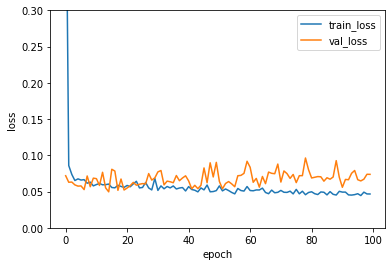

In [42]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()                               #epoch 20쯤부터는 검증set의 loss가 더 커진다. 따라서 그 이후는 필요없다.

In [43]:
layer4 = SingleLayerNN()
layer4.fit(x_train_scaled, y_train, epochs = 20)   #fit안에 epochs를 넣어줄 수 있다. 훈련을 일찍 마칠 수 있게.
layer4.score(x_val_scaled, y_val)

0.978021978021978

3.가중치 규제 (Regularization) :과대적합 자체를 해결!! 가중치를 규제해서 가중치의 값이 커지지 않도록!

In [48]:
##  Week 07-2_colab_practice 위에서 했던 내용 + 내용 추가
##  Week 07-2_colab_practice 위에서 했던 내용 + 내용 추가

class SingleLayerNN:
  #Loss Function
  def __init__(self, learning_rate = 0.1, l1 = 0, l2 = 0):     #추가#추가#추가#추가  
    self.w = None 
    self.b= None 
    self.losses=[]
    self.val_losses = []            #검증의 손실 부분을 기록하기 위해     
    self.w_history=[]                                   
    self.lr=learning_rate   
    self.l1 = l1                                                #추가#추가#추가#추가  
    self.l2 = l2                                                #추가#추가#추가#추가  
 
 #Random permutation for training samples
  def fwpass(self, x):
    z = np.sum(x*self.w) + self.b     #직선 방정식 계산
    return z
  
  def bwpass(self, x, err):    #err은 어디서 나왔나?
    w_grad = x*err      #가중치에 대한 그래디언트를 계산
    b_grad = 1*err      #절편에 대한 그래디언트를 계산
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)  #안전한 np.exp()계산을 위해       
    a = 1 / (1+np.exp(-z))      #시그모이드 계산
    return a

#fit() method
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):         
    self.w = np.ones(x.shape[1])           #가중치 초기화.
    self.b = 0                             #절편 초기화.
    self.w_history.append(self.w.copy())   #가중치 기록.           
    np.random.seed(42)                     #랜덤 시드 지정.
    for i in range(epochs):                #epochs만큼 반복.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:                     #모든 샘플에 대해 반복.
        z = self.fwpass(x[i])               #정방향 계산
        a = self.activation(z)              #활성화 함수 적용
        err=-(y[i] - a)                     #오차 계산 
        w_grad,b_grad = self.bwpass(x[i],err)   #역방향 계산
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w    #그래디언트에서 패널티 항의 미분값을 더한다.   #추가#추가#추가#추가  
        self.w -= self.lr * w_grad               #가중치 업데이트   
        self.b -= b_grad                          #절편 업데이트
        self.w_history.append(self.w.copy())                        
        #안전한로그계산을위해clipping한후loss를누적함
        a =np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))       #에포크마다 평균손실을 계산
      self.updata_val_loss(x_val, y_val)    #검증set에 대한 손실 계산      #추가#추가#추가#추가
  
#predict() method
  def predict(self, x): 
     z = [self.fwpass(x_i) for x_i in x]
     #print(z)                                                  
     #a = self.activation(np.array(z))                          
     return np.array(z) >= 0                                    
     #a > 0.5                                                   

#score method
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

  def reg_loss(self):                                                       
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)     

  def updata_val_loss(self, x_val, y_val):        #검증set에 대한 손실 계산      
    if x_val is None:                                                            
        return                                                                    
    val_loss = 0                                                              
    for i in range(len(x_val)):                                              
         z = self.fwpass(x_val[i])     #정방향 계산                              
         a = self.activation(z)        #활성화 함수 적용                            
         a = np.clip(a, 1e-10, 1-1e-10)                                            
         val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1-a))           
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())               #수정#수정#수정#수정

##  Week 07-2_colab_practice 위에서 했던 내용 + 내용 추가
##  Week 07-2_colab_practice 위에서 했던 내용 + 내용 추가



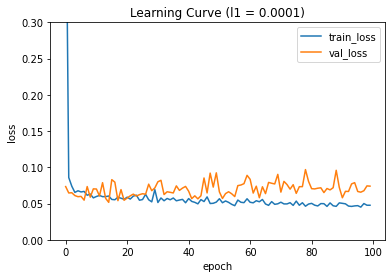

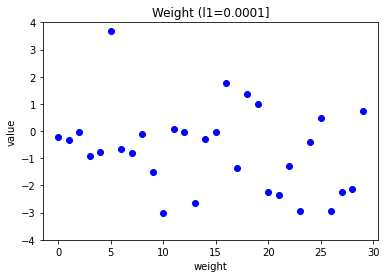

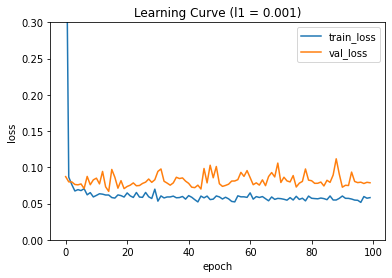

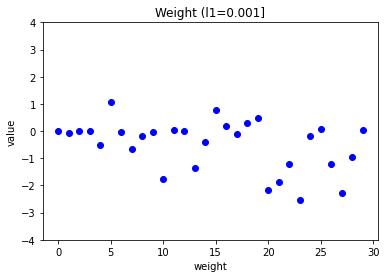

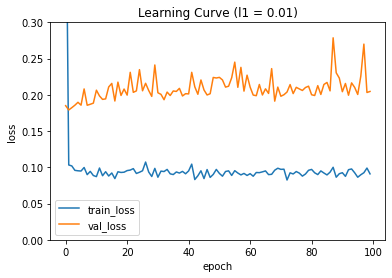

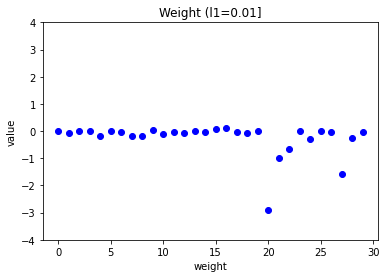

In [50]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayerNN(l1 = l1)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1 = {})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={}]'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [51]:
layer5 = SingleLayerNN(l1 = 0.001)
layer5.fit(x_train_scaled, y_train, epochs = 20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

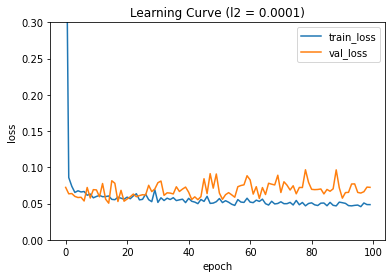

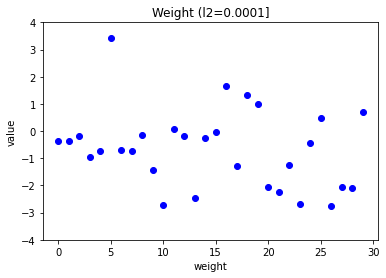

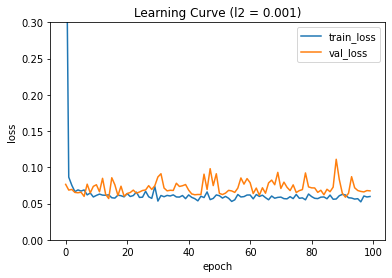

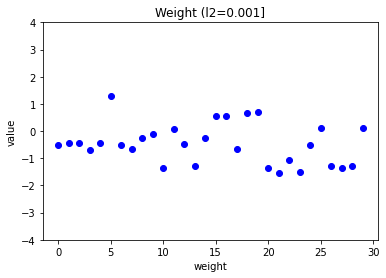

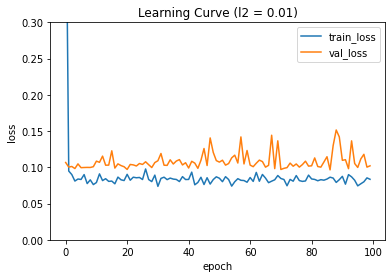

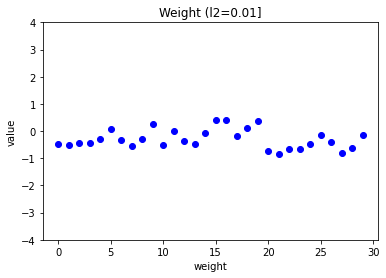

In [53]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayerNN(l2 = l2)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2 = {})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={}]'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [54]:
layer6 = SingleLayerNN(l2 = 0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.967032967032967

In [55]:
np.sum(layer6.predict(x_val_scaled) == y_val)

88

In [58]:
#위의 과정을 결국 scikit learn에서 아래와 같이 간단히 코딩할 수 있음

from sklearn.linear_model import SGDClassifier 

sgd = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.001, random_state = 42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

Cross Validation with NN

In [59]:
validation_scores = []

In [70]:
k = 10
bins = len(x_train_all) / k       #sample을 몇 개 넣을 것인지 결정

for i in range(k):
  start = i * bins
  end = (i + 1) * bins
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index = list(range(0, start)) + list(range(end, len(x_train_all)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold, axis = 0)
  train_std = np.std(train_fold, axis = 0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std
  
  lyr = SingleLayer(l2 = 0.01)
  lyr.fit(train_fold_scaled, train_target, epochs = 50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validataion_scores))

TypeError: ignored

In [65]:
# 위의 코드는 scikit learn의 CV로 쉽게 구현가능!!

from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))                       #결과 점수가 낮은 이유는 전처리인 표준화가 안됐기 때문.

0.850096618357488


In [68]:
, make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))     #점수가 올라간 것을 확인할 수 있다

0.9694202898550724


In [69]:
print(np.mean(scores['train_score']))

0.9875478561631581
